Generating performance metrics for the trained model.

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import json

with open('training_hist.json', 'r') as f:
    history = json.load(f)
history

{'loss': [1.2224533557891846,
  0.3369305729866028,
  0.2318025827407837,
  0.18644899129867554,
  0.1459229737520218,
  0.1420845091342926,
  0.1233576312661171,
  0.1273830533027649,
  0.10935060679912567,
  0.12015735357999802],
 'accuracy': [0.6399317383766174,
  0.8889394402503967,
  0.9227114319801331,
  0.9374350905418396,
  0.9517035484313965,
  0.9526424407958984,
  0.9597126245498657,
  0.9584892392158508,
  0.9649335145950317,
  0.9619887471199036],
 'val_loss': [0.48381075263023376,
  0.32887372374534607,
  0.24121835827827454,
  0.29893428087234497,
  0.26511773467063904,
  0.3428776264190674,
  0.3264375329017639,
  0.3403274118900299,
  0.3293282389640808,
  0.3767743706703186],
 'val_accuracy': [0.8387776017189026,
  0.8941497802734375,
  0.9243113994598389,
  0.906726598739624,
  0.9219212532043457,
  0.903425931930542,
  0.9087184071540833,
  0.9116207361221313,
  0.9141247272491455,
  0.9143523573875427]}

Visualizing the training and validation accuracy over epochs.

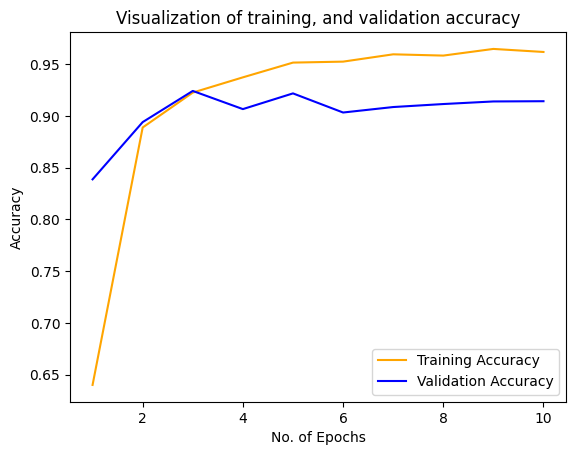

In [ ]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,history['accuracy'],color='orange',label='Training Accuracy')
plt.plot(epochs,history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of training, and validation accuracy')
plt.legend()
plt.show()


In [8]:
from tensorflow.keras.models import load_model
model = load_model('trained_model.keras')

In [9]:
test = r"C:\Users\ASUS\plant_diseases_extracted\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"
test_set = tf.keras.utils.image_dataset_from_directory(
    test,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [10]:
class_name = test_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [11]:
y_prediction = model.predict(test_set)
y_prediction

550/550 [==============================] - 28s 42ms/step


array([[1.0000000e+00, 1.7030377e-15, 2.5642817e-20, ..., 4.2091026e-35,
        2.1117799e-24, 9.5527936e-27],
       [9.6999443e-01, 2.0683827e-02, 2.8816237e-05, ..., 1.7083919e-07,
        2.7018814e-07, 1.5675980e-05],
       [1.0000000e+00, 2.8637152e-16, 1.2308692e-17, ..., 6.9063005e-30,
        5.5984040e-21, 2.3556384e-22],
       ...,
       [1.8667651e-08, 1.7119723e-15, 5.0748039e-10, ..., 7.7959811e-08,
        1.1836900e-12, 9.9462694e-01],
       [3.6235142e-13, 4.0324294e-23, 7.1176932e-15, ..., 3.0074550e-06,
        9.2871658e-20, 9.9999058e-01],
       [1.5739935e-16, 1.7244390e-16, 2.7255136e-18, ..., 3.7065784e-12,
        1.5968762e-08, 8.7175274e-01]], dtype=float32)

In [ ]:
predicted_categories = tf.argmax(y_prediction,axis=1)

In [14]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [17]:
true_categories_mat = tf.concat([y for x,y in test_set],axis=0)

In [18]:
true_categories_mat

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [19]:
true_categories = tf.argmax(true_categories_mat,axis=1)

In [20]:
true_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

Evaluation metrics of the model on the test set.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(true_categories,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.86      0.90       504
                                 Apple___Black_rot       0.94      0.97      0.96       497
                          Apple___Cedar_apple_rust       0.91      0.91      0.91       440
                                   Apple___healthy       0.87      0.92      0.89       502
                               Blueberry___healthy       0.84      0.97      0.90       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.95      0.96       421
                 Cherry_(including_sour)___healthy       0.99      0.92      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.82      0.88       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.93      0.

Making the confusion matrix for the model, and visualizing the matrix.

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_categories,predicted_categories)

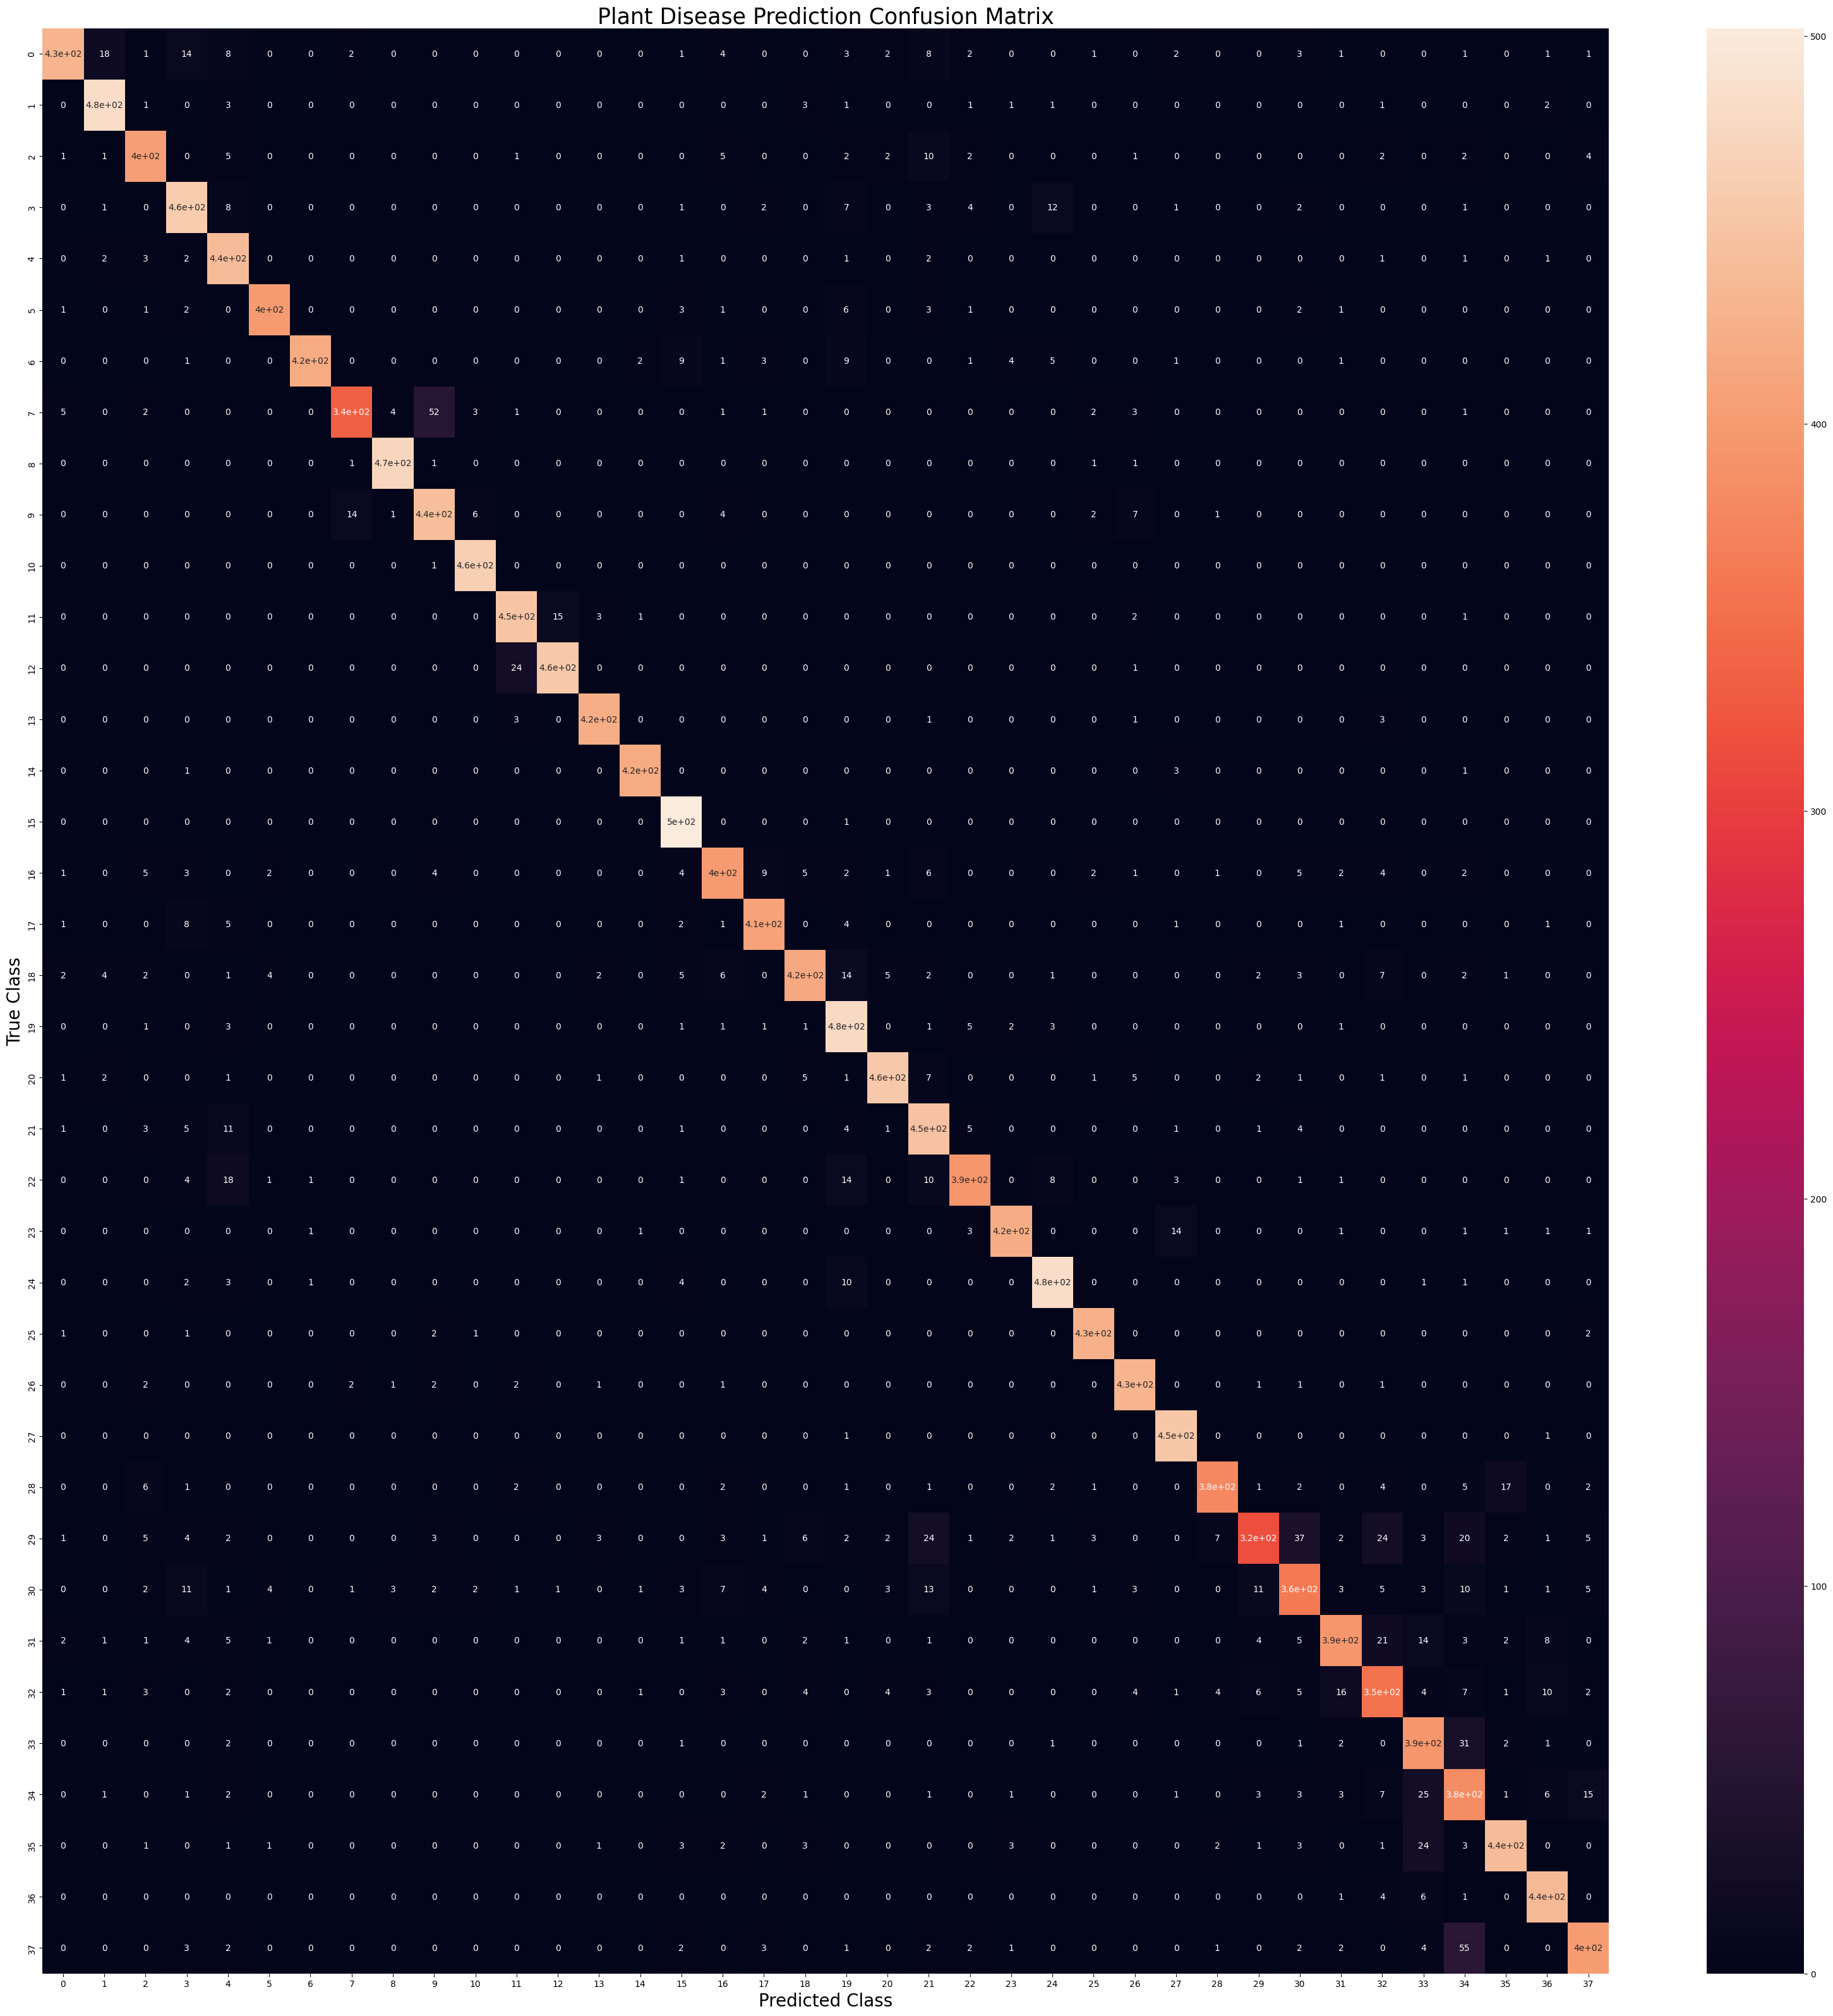

In [31]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("True Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize=25)
plt.show()